# DecisionTreeClassifier ALGORITHM

In [11]:
# Anemia Detection using Decision Tree Classifier

# This project focuses on early detection of anemia using machine learning techniques.
# A Decision Tree classifier is used due to its interpretability and suitability for medical diagnosis.


In [12]:
## Importing Required Libraries

# This section imports all the necessary Python libraries required for data handling,
# visualization, and machine learning model development.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [14]:
## Dataset Loading

# The dataset used in this project contains physiological parameters relevant to anemia detection.
# The data is loaded using Pandas for further analysis and preprocessing.


In [15]:
df=pd.read_csv('ANEMIA.CSV')


In [16]:
## Dataset Preview

# The first few records of the dataset are displayed to understand
# the structure and feature values.


In [17]:
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


In [18]:
df.tail()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy
1280,8.80,25.845,77.511,1.88076,5.14094,4.95,15.2,46.1526,89.7,30.6,34.2,279.0,14.312512,0.26028,Healthy


In [19]:
## Missing Value Analysis

# This step checks for missing values in the dataset,
# which can affect model performance.


In [20]:
print(df.isnull().sum())

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64


In [21]:
## Dataset Dimensions

# This shows the number of samples (rows) and features (columns) in the dataset.


In [22]:
df.columns

Index(['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV',
       'MCH', 'MCHC', 'PLT', 'PDW', 'PCT', 'Diagnosis'],
      dtype='object')

In [23]:
df=df.dropna()

In [24]:
## Dataset Information

# This provides details about data types, non-null values, and memory usage.


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [26]:
df['Diagnosis'].unique()

array(['Normocytic hypochromic anemia', 'Iron deficiency anemia',
       'Other microcytic anemia', 'Leukemia', 'Healthy',
       'Thrombocytopenia', 'Normocytic normochromic anemia',
       'Leukemia with thrombocytopenia', 'Macrocytic anemia'],
      dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Diagnosis']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [28]:
df['Diagnosis'].unique()

array([5, 1, 7, 2, 0, 8, 6, 3, 4])

In [29]:
## Feature Selection and Target Variable

# The dataset is divided into:
# - Input features (X1)
# - Target variable (y1)

# The target variable represents the anemia classification result.


In [30]:
x1 = df.drop(labels='Diagnosis', axis=1)
y1 = df.loc[:,'Diagnosis']

In [31]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0: 336, 5: 279, 6: 269, 1: 189, 8: 73, 7: 59, 2: 47, 4: 18, 3: 11})
OVER SAMPLING DATA COUNT  :  Counter({5: 336, 1: 336, 7: 336, 2: 336, 0: 336, 8: 336, 6: 336, 3: 336, 4: 336})


In [32]:
## Train-Test Split

# The dataset is split into training and testing sets to evaluate model performance on unseen data and prevent overfitting.


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  2419
NUMBER OF TEST DATASET      :  605
TOTAL NUMBER OF DATASET    :  3024


In [34]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  2419
NUMBER OF TEST DATASET      :  605
TOTAL NUMBER OF DATASET    :  3024


In [35]:
## Model Selection

# A Decision Tree Classifier is chosen due to its interpretability and suitability for medical diagnosis.


In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
## Model Training

# The Decision Tree model is trained using the training dataset.


In [38]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
## Model Prediction

# The trained model predicts anemia status for the test dataset.


In [40]:
predicted = DTC.predict(x_test)

In [41]:
## Classification Report

# This report provides precision, recall, and F1-score for each class.


In [42]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF DecisionTreeClassifier:\n\n',cr)

THE CLASSIFICATION REPORT OF DecisionTreeClassifier:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        67
           3       0.99      1.00      0.99        68
           4       1.00      1.00      1.00        67
           5       1.00      1.00      1.00        67
           6       1.00      0.99      0.99        68
           7       1.00      1.00      1.00        67
           8       1.00      1.00      1.00        67

    accuracy                           1.00       605
   macro avg       1.00      1.00      1.00       605
weighted avg       1.00      1.00      1.00       605



In [43]:
## Confusion Matrix

# The confusion matrix summarizes correct and incorrect predictions made by the model.


In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF DecisionTreeClassifier:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF DecisionTreeClassifier:


 [[67  0  0  0  0  0  0  0  0]
 [ 0 67  0  0  0  0  0  0  0]
 [ 0  0 67  0  0  0  0  0  0]
 [ 0  0  0 68  0  0  0  0  0]
 [ 0  0  0  0 67  0  0  0  0]
 [ 0  0  0  0  0 67  0  0  0]
 [ 0  0  0  1  0  0 67  0  0]
 [ 0  0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0  0 67]]


In [45]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(DTC, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [ 95.70247934  99.83471074 100.         100.          99.83443709]


In [46]:
## Model Accuracy

# Accuracy measures the overall correctness of the classification model.


In [47]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF DecisionTreeClassifier IS :",a*100)

THE ACCURACY SCORE OF DecisionTreeClassifier IS : 99.83471074380165


In [48]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF DecisionTreeClassifier IS :",hl*100)

THE HAMMING LOSS OF DecisionTreeClassifier IS : 0.1652892561983471


In [49]:
## Confusion Matrix Visualization

# This heatmap visually represents the confusion matrix for better interpretation.


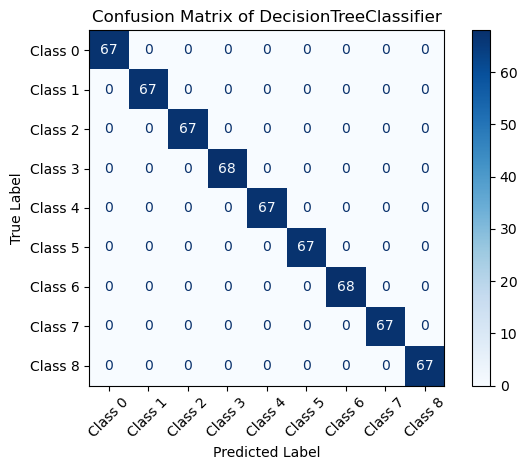

True Positives (per class): [67 67 67 68 67 67 68 67 67]


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = np.array([
    [67, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 67, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 67, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 68, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 67, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 67, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 68, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 67, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 67]
])

labels = [f"Class {i}" for i in range(9)]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix of DecisionTreeClassifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

true_positives = np.diag(cm)
false_positives = cm.sum(axis=0) - true_positives
false_negatives = cm.sum(axis=1) - true_positives


# Print the separated values
print("True Positives (per class):", true_positives)


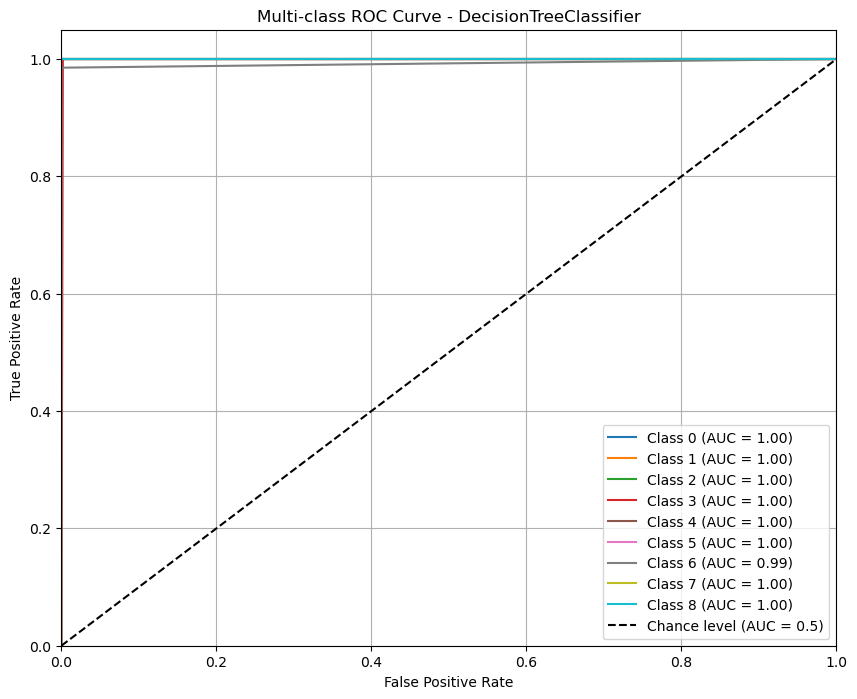

In [51]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

# Binarize the output for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Use predict_proba to get prediction probabilities
y_score = DTC.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i),
             label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve - DecisionTreeClassifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()


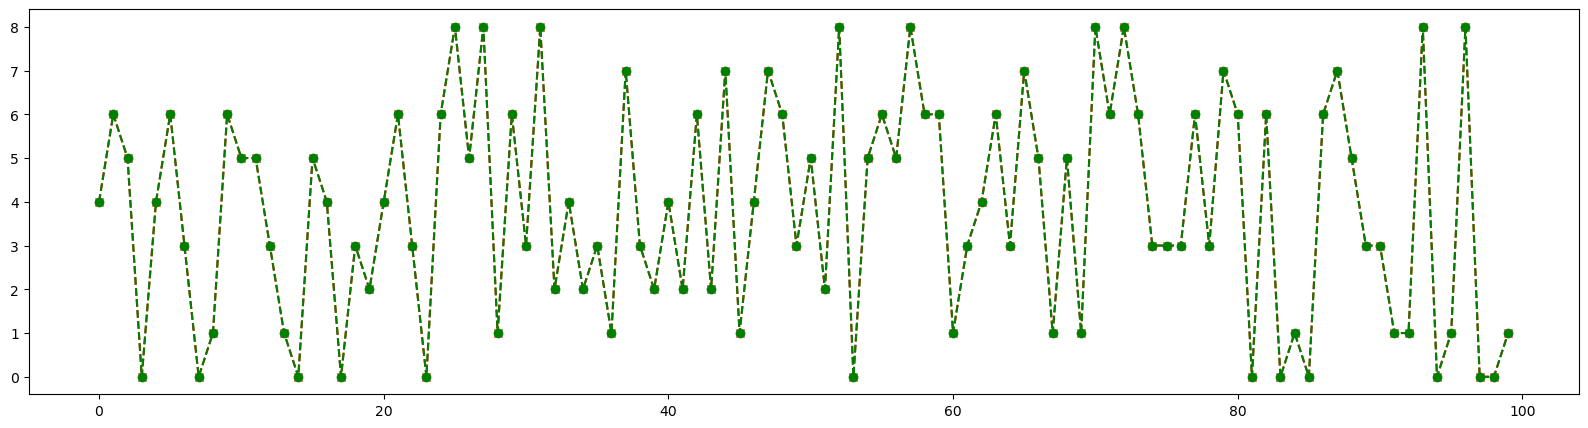

In [52]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [53]:

import joblib
joblib.dump(DTC, 'anemia.pkl')

['anemia.pkl']

In [54]:
## Conclusion and Future Work

#The Decision Tree model demonstrates effective performance for anemia detection.

### Future Enhancements
#- Integration with NIR sensor data
#- IoT-based real-time monitoring
#- Advanced ML models
